In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

import pyttsx3

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
DATADIR = "C:/Users/VISHWA/Desktop/Projects/Live Alpha Classification - Sem 7/LIVEAlpha"

CATEGORIES = ["A","B","C","D","E","G","H","I","L","O","V"]

In [3]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.utils import np_utils

Using TensorFlow backend.


In [4]:
training_data = []
def train_data():
    for category in CATEGORIES:

        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category) 

        for img in tqdm(os.listdir(path)): 
            image = load_img(os.path.join(path, img), target_size=(64, 64))
            image = img_to_array(image)
            training_data.append([image, class_num])  
train_data()

100%|█████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 466.47it/s]


In [5]:
import random
random.shuffle(training_data)

In [6]:
X = []
y = []
for feature, label in training_data:
    X.append(feature)
    y.append(label)

In [7]:
y = np_utils.to_categorical(y)

In [8]:
X = [i/255.0 for i in X]

In [9]:
X = np.array(X).reshape(-1, 64, 64, 3)

In [10]:
len(X)

550

In [11]:
X.shape

(550, 64, 64, 3)

In [12]:
model = Sequential()

model.add(Conv2D(filters=5, kernel_size=5, padding='same', activation='relu', 
                        input_shape=(64, 64, 3)))

model.add(MaxPooling2D(pool_size=(4, 4)))

model.add(Conv2D(filters=15, kernel_size=5, padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(4, 4)))

model.add(Flatten())
model.add(Dense(11, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [14]:
hist = model.fit(X, y, epochs=10, batch_size=5, validation_split=0.1, verbose=2)

Train on 495 samples, validate on 55 samples
Epoch 1/10
495/495 - 5s - loss: 2.3183 - acc: 0.2202 - val_loss: 2.1933 - val_acc: 0.2182
Epoch 2/10
495/495 - 1s - loss: 1.7168 - acc: 0.4667 - val_loss: 1.4464 - val_acc: 0.5455
Epoch 3/10
495/495 - 1s - loss: 0.9257 - acc: 0.7515 - val_loss: 1.1233 - val_acc: 0.6000
Epoch 4/10
495/495 - 1s - loss: 0.5293 - acc: 0.8667 - val_loss: 0.5609 - val_acc: 0.7636
Epoch 5/10
495/495 - 1s - loss: 0.3250 - acc: 0.9152 - val_loss: 0.3730 - val_acc: 0.8727
Epoch 6/10
495/495 - 1s - loss: 0.2221 - acc: 0.9475 - val_loss: 0.2521 - val_acc: 0.8909
Epoch 7/10
495/495 - 1s - loss: 0.1477 - acc: 0.9697 - val_loss: 0.2237 - val_acc: 0.9273
Epoch 8/10
495/495 - 1s - loss: 0.1162 - acc: 0.9737 - val_loss: 0.1722 - val_acc: 0.9636
Epoch 9/10
495/495 - 1s - loss: 0.0806 - acc: 0.9859 - val_loss: 0.1627 - val_acc: 0.9455
Epoch 10/10
495/495 - 1s - loss: 0.0608 - acc: 0.9939 - val_loss: 0.2384 - val_acc: 0.9455


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 5)         380       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 5)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 15)        1890      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 240)               0         
_________________________________________________________________
dense (Dense)                (None, 11)                2651      
Total params: 4,921
Trainable params: 4,921
Non-trainable params: 0
______________________________________________________

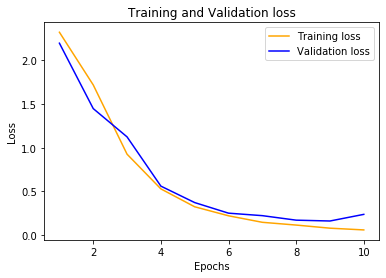

In [16]:
import matplotlib.pyplot as plt
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='orange', label='Training loss')
plt.plot(epochs, val_loss, color='blue', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

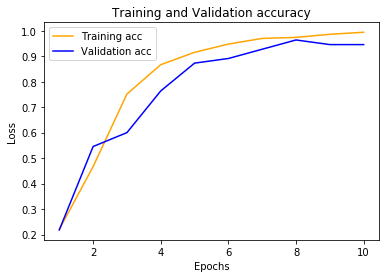

In [17]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
plt.plot(epochs, acc, color='orange', label='Training acc')
plt.plot(epochs, val_acc, color='blue', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
dictt = {
    0:"A",
    1:"B",
    2:"C",
    3:"D",
    4:"E",
    5:"G",
    6:"H",
    7:"I",
    8:"L",
    9:"O",
    10:"V",
}

In [19]:
from IPython.display import Audio
audio = {    
    0:'alpha/A.m4a',
    1:'alpha/B.m4a',
    2:'alpha/C.m4a',
    3:'alpha/D.m4a',
    4:'alpha/E.m4a',
    5:'alpha/G.m4a',
    6:'alpha/H.m4a',
    7:'alpha/I.m4a',
    8:'alpha/L.m4a',
    9:'alpha/O.m4a',
    10:'alpha/V.m4a',
}

In [24]:
# While Loop....Not optimized - Live Hand Sign Detection

cap = cv2.VideoCapture(0)
p = 0
counter = 0
while True:
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    l_h = 0
    l_s = 0
    l_v = 132
    u_h = 179
    u_s = 30
    u_v = 255

    lower_blue = np.array([l_h, l_s, l_v])
    upper_blue = np.array([u_h, u_s, u_v])
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    result = cv2.bitwise_and(frame, frame, mask=mask)
    
    start = (0,100)
    end = (200, 300)
    color = (255,255,255)
    thickness = 2
    
    rect = cv2.rectangle(mask, start, end, color, thickness)
    
    ROI = rect[100:300, 0:200]
    
    font = cv2.FONT_HERSHEY_SIMPLEX 
   
    cv2.putText(ROI,  
                dictt[p],  
                (25, 50),  
                font, 1,  
                (0,255,0),  
                2,  
                cv2.LINE_4)
    
    cv2.imshow("mask", rect)
    cv2.imshow("ROI", ROI)
    
    key = cv2.waitKey(1)
    if key == 27:
        break
    
    cv2.imwrite("Frame%d.jpg" % counter, ROI)
        
    image2 = load_img("Frame%d.jpg" % counter, target_size=(64, 64))

    image2 = img_to_array(image2)
    
    os.remove("Frame%d.jpg" % counter)
    
    image2 = image2.reshape((1, image2.shape[0], image2.shape[1], image2.shape[2]))
        
    result = model.predict([image2])
        
    d = result.reshape(11)
    f = list(d)
    try:
        p=f.index(1.)
    except:
        pass
        
    cv2.putText(ROI,  
                dictt[p],  
                (25, 50),  
                font, 1,  
                (0,255,0),  
                2,  
                cv2.LINE_4)
        
    counter = counter+1


cap.release()
cv2.destroyAllWindows()

In [22]:
# Simple Live Hand Sign Detection
cap = cv2.VideoCapture(0)
p = 0

                   
counter = 0
while True:
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    l_h = 0
    l_s = 0
    l_v = 132
    u_h = 179
    u_s = 30
    u_v = 255

    lower_blue = np.array([l_h, l_s, l_v])
    upper_blue = np.array([u_h, u_s, u_v])
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    result = cv2.bitwise_and(frame, frame, mask=mask)
    
    start = (0,100)
    end = (200, 300)
    color = (255,255,255)
    thickness = 2
    
    rect = cv2.rectangle(mask, start, end, color, thickness)
    
    ROI = rect[100:300, 0:200]
    
    font = cv2.FONT_HERSHEY_SIMPLEX 
   
    cv2.putText(ROI,  
                dictt[p],  
                (25, 50),  
                font, 1,  
                (0,255,0),  
                2,  
                cv2.LINE_4)
    
    cv2.imshow("mask", rect)
    cv2.imshow("ROI", ROI)
    
    key = cv2.waitKey(1)
    if key == 27:
        break
    elif key%256 == 32:
        cv2.imwrite("Frame%d.jpg" % counter, ROI)
        
        print("Loading Image - Keras")
        image2 = load_img("Frame%d.jpg" % counter, target_size=(64, 64))

        print("Converting Image to array")
        image2 = img_to_array(image2)
        
        print("Reshaping Image array to 64 x 64 x 3")
        image2 = image2.reshape((1, image2.shape[0], image2.shape[1], image2.shape[2]))
        
        print("Predicting...")
        result = model.predict([image2])
        
        d = result.reshape(11)
        f = list(d)
        try:
            p=f.index(1.)
        except:
            pass

        print(dictt[p])
        
        cv2.putText(ROI,  
                dictt[p],  
                (25, 50),  
                font, 1,  
                (0,255,0),  
                2,  
                cv2.LINE_4)
        
        counter = counter+1


cap.release()
cv2.destroyAllWindows()



In [24]:
dictt2 = {
    0:"How are you?",
    1:"It was nice chatting with you.",
    2:"Is everything OK ?",
    3:"Where are you going ?",
    4:"Help!",
    5:"I've no idea",
    6:"I am going home.",
    7:"Whats your phone number?",
    8:"Are you free?",
    9:"Oh no!",
    10:"I'm fine. Thanks.",
}

In [28]:
'''Final With Custom Voice Messages'''

cap = cv2.VideoCapture(0)
p = 0

                   
counter = 0
while True:
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    l_h = 0
    l_s = 0
    l_v = 132
    u_h = 179
    u_s = 30
    u_v = 255

    lower_blue = np.array([l_h, l_s, l_v])
    upper_blue = np.array([u_h, u_s, u_v])
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    result = cv2.bitwise_and(frame, frame, mask=mask)
    
    start = (0,100)
    end = (200, 300)
    color = (255,255,255)
    thickness = 2
    
    rect = cv2.rectangle(mask, start, end, color, thickness)
    
    ROI = rect[100:300, 0:200]
    
    font = cv2.FONT_HERSHEY_SIMPLEX 
   
    cv2.putText(ROI,  
                dictt[p],  
                (25, 50),  
                font, 1,  
                (0,255,0),  
                2,  
                cv2.LINE_4)
    
    cv2.imshow("mask", rect)
    cv2.imshow("ROI", ROI)
    
    key = cv2.waitKey(1)
    if key == 27:
        break
    elif key%256 == 32:
        cv2.imwrite("Frame%d.jpg" % counter, ROI)
        
        print("Loading Image - Keras")
        image2 = load_img("Frame%d.jpg" % counter, target_size=(64, 64))

        print("Converting Image to array")
        image2 = img_to_array(image2)
        
        print("Reshaping Image array to 64 x 64 x 3")
        image2 = image2.reshape((1, image2.shape[0], image2.shape[1], image2.shape[2]))
        
        print("Predicting...")
        result = model.predict([image2])
        
        d = result.reshape(11)
        f = list(d)
        try:
            p=f.index(1.)
        except:
            pass

        print(dictt[p])
        
        cv2.putText(ROI,  
                dictt[p],  
                (25, 50),  
                font, 1,  
                (0,255,0),  
                2,  
                cv2.LINE_4)
        im = cv2.imread("white.jpg")
        cv2.putText(im, dictt2[p], (25,50), font,  
                   1, (0,255,0), 2, cv2.LINE_AA)
        cv2.imshow("Message", im);
        
        engine = pyttsx3.init()
        voices = engine.getProperty('voices')
        engine.setProperty('voice', voices[1].id)
        engine.setProperty('rate', 150)
        engine.say(dictt2[p])
        engine.runAndWait()
        
        counter = counter+1


cap.release()
cv2.destroyAllWindows()



Loading Image - Keras
Converting Image to array
Reshaping Image array to 64 x 64 x 3
Predicting...
V
Loading Image - Keras
Converting Image to array
Reshaping Image array to 64 x 64 x 3
Predicting...
C
